In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import seaborn as sns 

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#data retrieved from https://www.drivendata.org/
blood = pd.read_csv('blood.csv')
test_blood = pd.read_csv('test_blood.csv')

In [3]:
# print blood.columns
blood.head()

Unnamed: 0  Months since Last Donation  Number of Donations  \
0         619                           2                   50   
1         664                           0                   13   
2         441                           1                   16   
3         160                           2                   20   
4         358                           1                   24   

   Total Volume Donated (c.c.)  Months since First Donation  \
0                        12500                           98   
1                         3250                           28   
2                         4000                           35   
3                         5000                           45   
4                         6000                           77   

   Made Donation in March 2007  
0                            1  
1                            1  
2                            1  
3                            1  
4                            0

In [4]:
blood.rename(columns={'Unnamed: 0': 'Donor_ID'}, inplace=True)
blood.rename(columns={'Months since Last Donation': 'Months_Since_Last'}, inplace=True)
blood.rename(columns={'Number of Donations': 'No_of_Donations'}, inplace=True)
blood.rename(columns={'Total Volume Donated (c.c.)': 'Total_Volume'}, inplace=True)
blood.rename(columns={'Months since First Donation': 'Months_Since_First'}, inplace=True)
blood.rename(columns={'Made Donation in March 2007': 'Made_Donation'}, inplace=True)

test_blood.rename(columns={'Unnamed: 0': 'Donor_ID'}, inplace=True)
test_blood.rename(columns={'Months since Last Donation': 'Months_Since_Last'}, inplace=True)
test_blood.rename(columns={'Number of Donations': 'No_of_Donations'}, inplace=True)
test_blood.rename(columns={'Total Volume Donated (c.c.)': 'Total_Volume'}, inplace=True)
test_blood.rename(columns={'Months since First Donation': 'Months_Since_First'}, inplace=True)
test_blood.rename(columns={'Made Donation in March 2007': 'Made_Donation'}, inplace=True)

In [5]:
#investigate if months since last donation affects whether the individual makes a donation

bins = [-1, 2, 7, 14, 74]
group_names = ['0 - 2 mths', '2 - 7 mths', '7 - 14 mths', '14 - 74 mths']
blood['period'] = pd.cut(blood['Months_Since_Last'], bins, labels=group_names)
blood.pivot_table(values='Made_Donation', index='period', aggfunc=np.mean)

period
0 - 2 mths      0.385621
2 - 7 mths      0.338235
7 - 14 mths     0.142857
14 - 74 mths    0.082707
Name: Made_Donation, dtype: float64

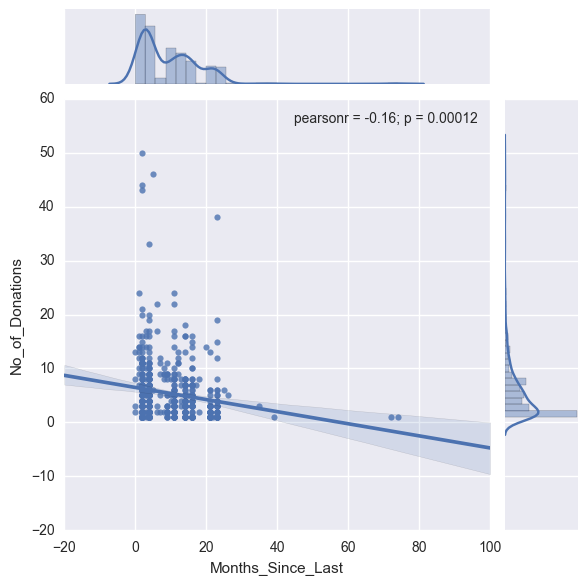

In [6]:
#no clear r/s between months_since_last and no_of_donations
# sns.regplot('Months_Since_Last', 'No_of_Donations', data=blood)
x=blood['Months_Since_Last']
y=blood['No_of_Donations']
sns.jointplot(x, y, kind="reg")

Ttest_indResult(statistic=5.4190894629908319, pvalue=8.8288193736166487e-08)

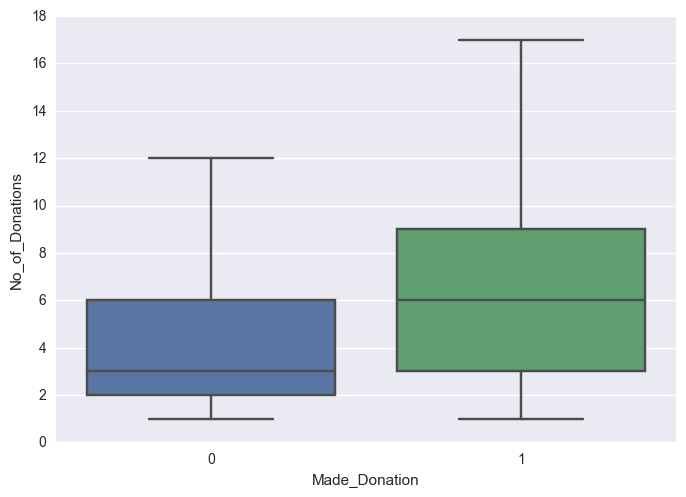

In [7]:
#individuals who did return to donate blood have significantly higher donation history. 
sns.boxplot(x="Made_Donation", y="No_of_Donations", data=blood, showfliers=False)

from scipy.stats import ttest_ind

cat1 = blood[blood['Made_Donation']==1]
cat2 = blood[blood['Made_Donation']==0]

ttest_ind(cat1['No_of_Donations'], cat2['No_of_Donations'])

In [8]:
#prepare dataset 

X_train = blood.drop(["Made_Donation", "period"], axis=1)
Y_train = blood["Made_Donation"]
X_test  = test_blood
print X_train.shape, Y_train.shape, X_test.shape

(576, 5) (576,) (200, 5)


In [12]:
#fitting to various models 

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
print "Perceptron Accuracy: %r "  % (acc_perceptron)

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
print "Gaussian Accuracy: %r "  % (acc_gaussian)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred1 = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
print "KNN: %r "  % (acc_knn)

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
print "SVC: %r " % (acc_svc)

Perceptron Accuracy: 76.04 
Gaussian Accuracy: 74.65 
KNN: 83.16 
SVC: 99.48 


In [ ]:
##to delete from below this 

In [16]:
blood

Donor_ID  Months_Since_Last  No_of_Donations  Total_Volume  \
0         619                  2               50         12500   
1         664                  0               13          3250   
2         441                  1               16          4000   
3         160                  2               20          5000   
4         358                  1               24          6000   
5         335                  4                4          1000   
6          47                  2                7          1750   
7         164                  1               12          3000   
8         736                  5               46         11500   
9         436                  0                3           750   
10        460                  2               10          2500   
11        285                  1               13          3250   
12        499                  2                6          1500   
13        356                  2                5          1250   
14         40                  2               14          3500   
15        191                  2               15          3750   
16        638                  2                6          1500   
17        345                  2                3           750   
18        463                  2                3           750   
19        372                  4               11          2750   
20          8                  2                6          1500   
21        539                  2                6          1500   
22        734                  4               14          3500   
23        573                  4                6          1500   
24        482                  4                8          2000   
25        330                  1               14          3500   
26        222                  4               10          2500   
27        175                  4               10          2500   
28        606                  2               16          4000   
29        340                  2                8          2000   
..        ...                ...              ...           ...   
546       577                 11                4          1000   
547       118                 21                6          1500   
548       532                 23                2           500   
549       338                 23                6          1500   
550       365                 14                2           500   
551       173                 16                4          1000   
552       715                 16                5          1250   
553         2                 21                2           500   
554       387                 21                3           750   
555       738                 23                8          2000   
556       610                 21                3           750   
557       450                 21                3           750   
558       232                 21                1           250   
559       440                 21                1           250   
560       183                 25                6          1500   
561        60                 21                1           250   
562        58                 21                1           250   
563        49                 23                3           750   
564       674                 21                2           500   
565       204                 14                3           750   
566       361                 23                1           250   
567        30                 23                1           250   
568       337                 23                1           250   
569       496                 23                1           250   
570       169                 23                1           250   
571       698                 23                1           250   
572       433                 16                3           750   
573       360                 21                2   

In [23]:
X = blood.iloc[:, 1:5]
y = blood['Made_Donation']

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [27]:
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [38]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 4))


# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=4, units=6)`
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1, activation="sigmoid", kernel_initializer="uniform")`


Epoch 1/100
460/460 [==============================] - 0s - loss: 0.6863 - acc: 0.7761     
Epoch 2/100
460/460 [==============================] - 0s - loss: 0.6643 - acc: 0.7761     
Epoch 3/100
460/460 [==============================] - 0s - loss: 0.6283 - acc: 0.7761     
Epoch 4/100
460/460 [==============================] - 0s - loss: 0.5859 - acc: 0.7761     
Epoch 5/100
460/460 [==============================] - 0s - loss: 0.5481 - acc: 0.7761     
Epoch 6/100
460/460 [==============================] - 0s - loss: 0.5199 - acc: 0.7761     
Epoch 7/100
460/460 [==============================] - 0s - loss: 0.5018 - acc: 0.7761     
Epoch 8/100
460/460 [==============================] - 0s - loss: 0.4900 - acc: 0.7761     
Epoch 9/100
460/460 [==============================] - 0s - loss: 0.4822 - acc: 0.7761     
Epoch 10/100
460/460 [==============================] - 0s - loss: 0.4770 - acc: 0.7761     
Epoch 11/100
460/460 [==============================] - 0s - loss: 0.4735 - acc

In [31]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[77,  4],
       [25, 10]])